<a href="https://colab.research.google.com/github/manthra16695/Code-360/blob/main/House_Rent_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dataset using Pandas

In [44]:
import pandas as pd
data=pd.read_csv('/content/sample_data/rental_data _reg.csv')

Data Cleaning

In [45]:
##Removing variables which has no significance in our model
data=data.drop(labels=['Unnamed: 0','link','result-hood','title'],axis=1)
data.head() 

,br,region,result-price,sqft,type
0,3.0,tampa bay area,"$1,695",NaN,apartment
1,2.0,tampa bay area,"$1,390",1182.0,apartment
2,2.0,tampa bay area,"$14,901,795",1101.0,apartment
3,2.0,tampa bay area,"$1,285",1025.0,apartment
4,2.0,tampa bay area,"$1,379",1028.0,apartment


In [46]:
data.dtypes
data.isnull().sum()## There are 3549 NA values in sqft column and 417 NA values in Bedrooms column

br               417
region             0
result-price       0
sqft            3549
type               0
dtype: int64

In [47]:
##Dropping records with atleast one of thier columns with NA value
data=data.dropna(how='any')
data.count()

br              11268
region          11268
result-price    11268
sqft            11268
type            11268
dtype: int64

In [48]:
##Converting the variable data types into relevant ones
data['br']=data['br'].astype({"br":object})
data.dtypes

br               object
region           object
result-price     object
sqft            float64
type             object
dtype: object

In [49]:
##Converting price into int by converting $ symbol data as regular expression
data['result-price']=data['result-price'].str.replace('[\$,]','',regex=True).astype('int')

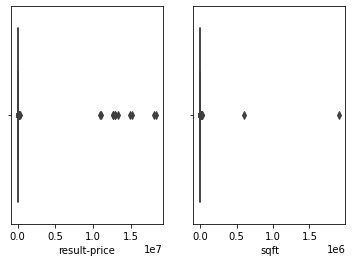

In [50]:
##Univariate Analysis
plt.figure()
plt.subplot(1,2,1)
sns.boxplot(data=data,x=data['result-price']) ## Column Price has significant Outliers which needs to be treated
plt.subplot(1,2,2)
sns.boxplot(data=data,x=data['sqft'])## Column sqft also has significant Outliers which needs to be treated

Outlier Removal


In [55]:
##Outlier removal for Price
q1=data['result-price'].quantile(0.25)
q3=data['result-price'].quantile(0.75)

IQR=q3-q1
print(IQR)

low_whisker=q1-1.5*(IQR)

upper_whisker=q3+1.5*(IQR)

print(low_whisker,upper_whisker)

671.75
21.375 2708.375


In [56]:
##Outlier Treatment by removing all rows with outliers
data=data[data['result-price']<upper_whisker] 

data=data[data['result-price']>low_whisker] 
data.shape

(10655, 5)

In [63]:
##Outlier removal for Price
q1=data['sqft'].quantile(0.25)
q3=data['sqft'].quantile(0.75)

IQR=q3-q1
print(IQR)

low_whisker=q1-1.5*(IQR)

upper_whisker=q3+1.5*(IQR)

print(low_whisker,upper_whisker)

474.0
25.0 1921.0


In [64]:
##Outlier Treatment by removing all rows with outliers
data=data[data['sqft']<upper_whisker] 

data=data[data['sqft']>low_whisker] 
data.shape

(9929, 5)

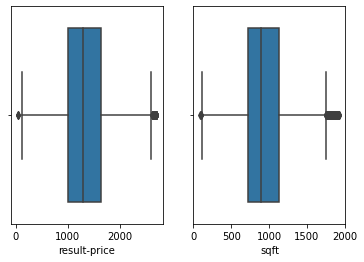

In [70]:
##Univariate Analysis
plt.figure()
plt.subplot(1,2,1)
sns.boxplot(data=data,x=data['result-price']) ## Column Price has significant Outliers which needs to be treated
plt.subplot(1,2,2)
sns.boxplot(data=data,x=data['sqft'])## Column sqft also has significant Outliers which needs to be treated

In [77]:
data['result-price'].mean()
data['result-price'].median()
##Seems like the result price variable is right skewed distribution

1358.0145029710948

Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


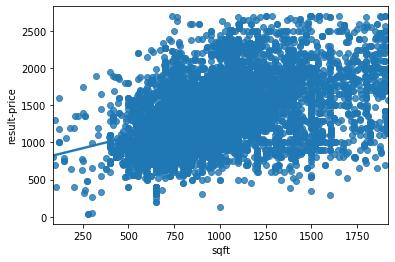

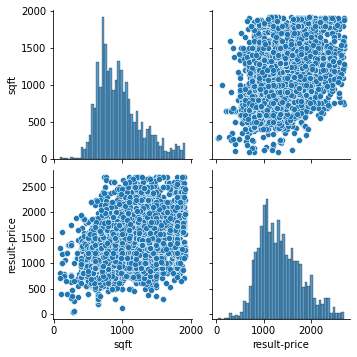

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# numericaldata=data[['result-price','sqft']]
# sns.scatterplot(data['sqft'],data['result-price'])
# data['sqft']
# data['result-price']
# sq=int(data['sqft'])
sns.regplot(data['sqft'],data['result-price']) ##A positive correlation between sqft and rent price
sns.pairplot(data=data,vars=['sqft','result-price'])

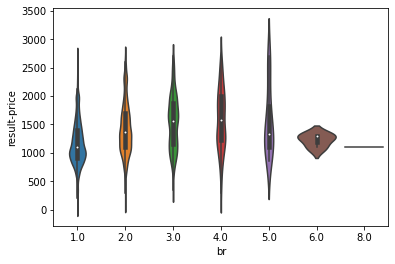

In [80]:
##Relation Between Region and Price
sns.violinplot(x=data['br'],y=data['result-price'])

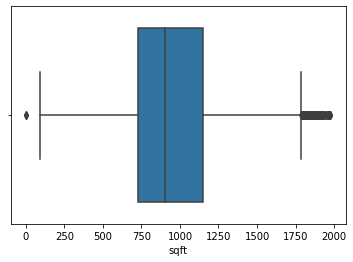

In [40]:
sns.boxplot(data=data,x=data['result-price'])
sns.boxplot(data=data,x=data['sqft'])